# <span style = "color:green"> Text-Based Emotion Detection</span>

***

Emotion detection (ED) is a brach of sentiment analysis that deals with the extraction and analysis of emotions. The evolution of web 2.0 has put text mining and analysis at the frontiers of organizational success. It helps service provider provide tailor-made services to their customers. Numerous studies are being carried out in the area of text mining and analysis due to the ease in sourcing for data and the vast benefits its deliverable offers.

### Content

There are two columns
* Text
* Emotion

The emotions column has various categories ranging from happiness to sadness to love and fear.

## Let's Begin

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

### Read 'Emotion_final.csv' and store it in a dataframe variable

In [2]:
df = pd.read_csv('Emotion_final.csv')

### View head

In [3]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Print some of the texts

In [4]:
for i in range(10):
    print(df['Text'][i])

i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
im grabbing a minute to post i feel greedy wrong
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
i am feeling grouchy
ive been feeling a little burdened lately wasnt sure why that was
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
i feel as confused about life as a teenager or as jaded as a year old man
i have been with petronas for years i feel that petronas has performed well and made a huge profit
i feel romantic too


### Check unique values in Emotion

In [5]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

### View info of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


### Check for null values, Remove if any

In [7]:
df.isna().sum()

Text       0
Emotion    0
dtype: int64

### Check for duplicates, Remove if any

In [8]:
df.duplicated().sum()

3

In [9]:
df.drop_duplicates(inplace=True,keep='first')
df.duplicated().sum()

0

### Print some of the happy text

In [10]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [11]:
happy_text = df[df['Emotion'] == 'happy']
happy_text.reset_index(inplace=True)
for i in range(10):
    print(happy_text['Text'][i])


i have been with petronas for years i feel that petronas has performed well and made a huge profit
i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter
i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious
i do not feel reassured anxiety is on each side
i have the feeling she was amused and delighted
i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me
i feel more superior dead chicken or grieving child
i get giddy over feeling elegant in a perfectly fitted pencil skirt
i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where sex

### Print some of the sadness texts

In [12]:
sad_text = df[df['Emotion'] == 'sadness']
sad_text.reset_index(inplace=True)
for i in range(10):
    print(happy_text['Text'][i])

i have been with petronas for years i feel that petronas has performed well and made a huge profit
i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter
i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious
i do not feel reassured anxiety is on each side
i have the feeling she was amused and delighted
i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me
i feel more superior dead chicken or grieving child
i get giddy over feeling elegant in a perfectly fitted pencil skirt
i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where sex

### Print some of the surpise texts

In [13]:
sup_text = df[df['Emotion'] == 'suprise']
sup_text.reset_index(inplace=True)
for i in range(10):
    print(happy_text['Text'][i])

i have been with petronas for years i feel that petronas has performed well and made a huge profit
i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter
i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious
i do not feel reassured anxiety is on each side
i have the feeling she was amused and delighted
i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me
i feel more superior dead chicken or grieving child
i get giddy over feeling elegant in a perfectly fitted pencil skirt
i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where sex

### Plot a countplot of Emotions

<Axes: xlabel='count', ylabel='Emotion'>

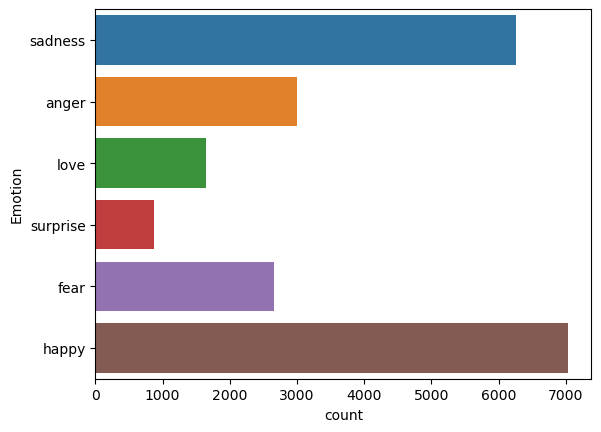

In [14]:
sns.countplot(y=df['Emotion'])

### Convert Emotions column to numerical values using Label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
df['Emotion'] = le.fit_transform(df['Emotion'])

In [18]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


### Store the classes in a list
* use le.classes_ to fetch the classes

In [19]:
print(le.classes_)

['anger' 'fear' 'happy' 'love' 'sadness' 'surprise']


### Create a function to preprocess the text (lemmatize,lower,remove stopwords, remove special characters)

In [20]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

### Apply the function to Text in our dataframe

In [21]:
df['Text'] = df['Text'].apply(preprocess)

In [22]:
df.head()

,Text,Emotion
0,didnt feel humiliate,4
1,go feel hopeless damn hopeful around someone c...,4
2,im grab minute post feel greedy wrong,0
3,ever feel nostalgic fireplace know still property,3
4,feel grouchy,0


### View some of the texts after preprocessing

In [23]:
for i  in range(10):
    print(df['Text'][i])

didnt feel humiliate
go feel hopeless damn hopeful around someone care awake
im grab minute post feel greedy wrong
ever feel nostalgic fireplace know still property
feel grouchy
ive feel little burden lately wasnt sure
ive take milligrams time recommend amount ive fall asleep lot faster also feel like funny
feel confuse life teenager jade year old man
petronas years feel petronas perform well make huge profit
feel romantic


### Convert text to vectors

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
x =df['Text']
vectorizer = TfidfVectorizer(ngram_range=(3,3))
x = vectorizer.fit_transform(x)


In [38]:
x.shape

(21456, 147873)

### Split the dataset into training and Testing set

In [39]:
y =df['Emotion']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

### Create a Random forest classifier model

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier()

# Train the model

In [44]:
model.fit(x_train,y_train)

RandomForestClassifier()

### Check the score of the model

In [46]:
model.score(x_train,y_train)

0.9844197350023304

### Make predictions with X_test

In [47]:
y_pred = model.predict(x_test)

### Check the accuracy of our prediction

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
accuracy_score(y_test,y_pred)

0.38263166071151156

### Create confusion matrix

<Axes: >

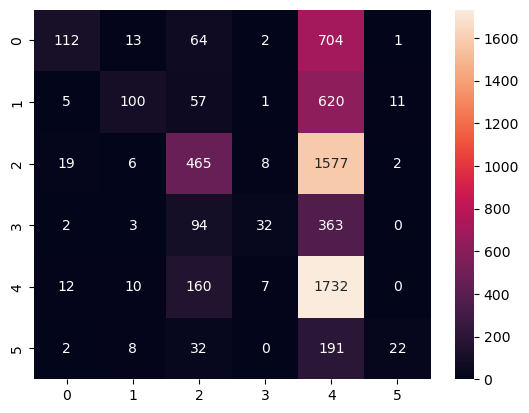

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Create classification report

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.12      0.21       896
           1       0.71      0.13      0.21       794
           2       0.53      0.22      0.32      2077
           3       0.64      0.06      0.12       494
           4       0.33      0.90      0.49      1921
           5       0.61      0.09      0.15       255

    accuracy                           0.38      6437
   macro avg       0.59      0.25      0.25      6437
weighted avg       0.54      0.38      0.32      6437



***